Importing Library

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
import os

Importing and Reading Data

In [ ]:
images = []
labels = []

In [ ]:
for label_path in os.listdir("/content/drive/MyDrive/images"):
  im = os.listdir(os.path.join("/content/drive/MyDrive/images",label_path))
  im = [ random.choice(im) for i in range (100)]
  for image_path in im:
    img = Image.open(os.path.join("/content/drive/MyDrive/images",label_path,image_path))
    img.mode != 'RGB'
    img = img.convert('RGB')
    arr = np.array(img)
    resized_img = np.array(Image.fromarray(arr).resize((64,64)))
    images.append(resized_img)
    labels.append(label_path)

In [ ]:
x = np.array(images)
y = np.array(labels)

In [ ]:
y

array(['cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'dogs', 'dogs', 'dogs', 'dogs',
       'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs',
      

In [ ]:
x = x/255

Encoding the String value into Catagerical value

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

Spliting the Train and Test Data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test_total,y_train,y_test_total = train_test_split(x,y, test_size =0.25, random_state=0)
x_test,x_val,y_test,y_val = train_test_split(x_test_total,y_test_total, test_size = 0.25, random_state = 0)

Importing Library

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


In [ ]:
model = Sequential()

Convolutional Layer and MaxPooling Layer

In [ ]:
model.add(Conv2D(filters=16,kernel_size=(3,3),activation = 'relu',input_shape=(64,64,3)))
model.add(MaxPooling2D((2,2)))

In [ ]:
model.add(Conv2D(filters=32,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))

Flattening the Layer

In [ ]:
model.add(Flatten())

Creating Neural Network

In [ ]:
model.add(Dense(kernel_initializer='uniform',activation='relu',units = 100))
model.add(Dense(units=100,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

Compiling the Model

In [ ]:
model.compile(loss='binary_crossentropy',metrics=['acc'],optimizer='adam')

Fit the Model

In [ ]:
h=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs =30,batch_size=100)

Epoch 1/30
2/2 [==============================] - 0s 194ms/step - loss: 0.0183 - acc: 1.0000 - val_loss: 0.5031 - val_acc: 0.8462
Epoch 2/30
2/2 [==============================] - 0s 177ms/step - loss: 0.0921 - acc: 0.9800 - val_loss: 0.5728 - val_acc: 0.8462
Epoch 3/30
2/2 [==============================] - 0s 165ms/step - loss: 0.0166 - acc: 0.9933 - val_loss: 1.2259 - val_acc: 0.5385
Epoch 4/30
2/2 [==============================] - 0s 160ms/step - loss: 0.0638 - acc: 0.9933 - val_loss: 1.1653 - val_acc: 0.5385
Epoch 5/30
2/2 [==============================] - 0s 163ms/step - loss: 0.0309 - acc: 0.9933 - val_loss: 0.6840 - val_acc: 0.8462
Epoch 6/30
2/2 [==============================] - 0s 160ms/step - loss: 0.0104 - acc: 1.0000 - val_loss: 0.5333 - val_acc: 0.8462
Epoch 7/30
2/2 [==============================] - 0s 170ms/step - loss: 0.0434 - acc: 0.9933 - val_loss: 0.5792 - val_acc: 0.8462
Epoch 8/30
2/2 [==============================] - 0s 160ms/step - loss: 0.0186 - acc: 0.99

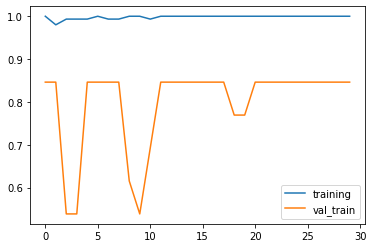

In [ ]:
import matplotlib.pyplot as plt
plt.plot(h.history['acc'],label='training')
plt.plot(h.history['val_acc'],label = 'val_train')
plt.legend()
plt.show()